# Kamień Milowy 3

## TLDR 

**Interpretability Beyond Feature Attribution: Quantitative Testing with Concept Activation Vectors (TCAV)**

*Been Kim, Martin Wattenberg, Justin Gilmer, Carrie Cai, James Wexler, Fernanda Viegas, Rory Sayres*

https://arxiv.org/abs/1711.11279

W artykule wprowadzono pomysł wyjaśnień opartych na konceptach. Potrzebne do tego są dwa zbiory, jeden zawierający przykłady konceptu, drugi który nie zawiera przykładów konceptu. Aby uzyskać Concept Activation Vector (CAV), z modelu wyłuskujemy wartości aktywacji z dowolnej warstwy. Wyznaczamy liniową granicę decyzyjną pomiędzy zbiorami w takiej reprezentacji. CAV to wektor prostopadły do tej granicy.

Zalety:
+ w czasie projektowania i treningu sieci nie musimy wyznaczać konceptów. Definiuje je użytkownik końcowy tworząc dwa zbiory przykładów
+ wg autorów wyjaśnienia uzyskane w ten sposób są bardziej zrozumiałe dla ludzi

Wady:
+ skuteczność metody zależy od wyboru zbiorów przykładów
+ podatność na manipulacje poprzez komponowanie odpowiednich zbiorów przykładów

**Can We Do Better Than Random Start? The Power of Data Outsourcing**

*YI CHEN, JING DONG, XIN T. TONG*

https://arxiv.org/pdf/2205.08098.pdf

W artykule zostały przedstawione 3 algorytmy służące do znajdowania punktów startowych do rozpoczęcia algorytmów uczenia. Są nimi: Sampling-based Initial Point Selection (SIPS), Optimization-based Initial Point Selection (OIPS) oraz OIPS-SAO. Losowe wybór punktów niesie za sobą ryzyka, np. utknięcie w lokalnym minimum i nie znalezienie globalnego. Opracowane na podstawie statystycznych twierdzeń algorytmy sprawdzają się dużo lepiej. Autorzy przedstawiają teoretyczne uzasadnienie, jak i przykładowy test z wizualizacją, które potwierdzają ich skuteczność. Jednakże, zostały one potwierdzone przy spełnieniu ustalonych przez nich założeń, podczas gdy w rzeczywistości sytuacje nie są tak klarowne. Zaprezentowane algorytmy mają działać na małej próbce danych by koszt ich użycia był niewielki. Problem został połączony z data outsourcingiem, w którym ilość danych otrzymanych do pracy jest odgórnie narzucona.


**It takes a lot of energy for machines to learn – here’s why AI is so power-hungry**

*Kate Saenko*

https://theconversation.com/it-takes-a-lot-of-energy-for-machines-to-learn-heres-why-ai-is-so-power-hungry-151825

Artykuł porusza problem zużycia energi przy trenowaniu modeli bazujących na samouczeniu. Autorka stawia tezę dyskredytującą aktualne techniki trenowania modelu, uważając je za nieefektywne. Porównując je z działaniem mózgu człowieka, przytacza przykład modelu BERT analizującego język, w którym maszyna potrzebowała kilka tysięcy razy większej ilości danych oraz przejścia po nich kilkadziesiąt razy by otrzymać zadawalające rezultaty. Wyliczono, że model ten, przetwarzając 3.3 miliarda słów z książek i artykułów z Wikipedii, miał ślad węglowy porównywalny z przelotem Boeinga 747 z Nowego Yorku do San Francisco i z powrotem.

 Autorka przedstawia również kolejną szkodliwą dla środowiska technikę rozbudowywania modeli do ogromnych rozmiarów, dającą dodatkowy procent skuteczności, mimo tego, że większość neuronów jest w tym modelu nieaktywnych.

W przyszłości jest szansa na zmiejszynie zużycia energetycznego dzięki opracowaniu lepszych algorytmów i bardziej optymalnych metod uczenia.

## Szablon sekcji raportu

*Abstract*
1. Introduction
- interpretability for image classification
- related work (mention KP, shap, lime, Axiomatic Attribution for Deep Networks(IG))
2. Methods
- trained models (resnet-18 and mobilenet)
3. Results
- comparison of resnet 18 explanations and mobilenet explanations on the same samples
5. Conclusion

## Wyjaśnienia MobileNet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

dataset = torchvision.datasets.ImageFolder('/kaggle/input/kandinskychallange/challenge-nr-1/', transform=transform)

In [3]:
PATH = '/kaggle/input/km2-2022l-wb/model/mobileNet.pth'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = torchvision.models.mobilenet_v3_small().to(device)
model.classifier[3] = nn.Linear(1024, 3)
model.load_state_dict(torch.load(PATH))
model.eval()
model = model.to(device)

In [4]:
!pip install captum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.0 MB/s eta 0:00:00


In [5]:
from captum.attr import Lime, visualization
from skimage import segmentation

In [6]:
def get_img(idx, dataset=dataset):
    return dataset[idx][0].to(device), dataset[idx][1]

img, clss = get_img(100)
img = img.unsqueeze(0).to(device)
img, clss

(tensor([[[[0.4508, 0.4508, 0.4508,  ..., 0.4508, 0.4508, 0.4508],
           [0.4508, 0.4508, 0.4508,  ..., 0.4508, 0.4508, 0.4508],
           [0.4508, 0.4508, 0.4508,  ..., 0.4508, 0.4508, 0.4508],
           ...,
           [0.4508, 0.4508, 0.4508,  ..., 0.4508, 0.4508, 0.4508],
           [0.4508, 0.4508, 0.4508,  ..., 0.4508, 0.4508, 0.4508],
           [0.4508, 0.4508, 0.4508,  ..., 0.4508, 0.4508, 0.4508]],
 
          [[0.5903, 0.5903, 0.5903,  ..., 0.5903, 0.5903, 0.5903],
           [0.5903, 0.5903, 0.5903,  ..., 0.5903, 0.5903, 0.5903],
           [0.5903, 0.5903, 0.5903,  ..., 0.5903, 0.5903, 0.5903],
           ...,
           [0.5903, 0.5903, 0.5903,  ..., 0.5903, 0.5903, 0.5903],
           [0.5903, 0.5903, 0.5903,  ..., 0.5903, 0.5903, 0.5903],
           [0.5903, 0.5903, 0.5903,  ..., 0.5903, 0.5903, 0.5903]],
 
          [[0.8099, 0.8099, 0.8099,  ..., 0.8099, 0.8099, 0.8099],
           [0.8099, 0.8099, 0.8099,  ..., 0.8099, 0.8099, 0.8099],
           [0.8099, 0.80

In [7]:
dataloader = torch.utils.data.DataLoader(dataset=dataset, batch_size=32, num_workers=2, shuffle=False)

In [8]:
test_preds = torch.tensor([])

with torch.no_grad():
    for i, (inputs, labels) in enumerate(dataloader):
        if i % 20 == 0:
            print(i)
        preds = model(inputs.to(device))
        test_preds = torch.cat((test_preds.to("cpu"), preds.to("cpu")), dim=0)

0
20
40
60
80


In [9]:
predicted = torch.argmax(test_preds, dim=1)
labels = torch.tensor([0]*1000 + [1] * 1000 + [2] * 1000)
missed = torch.nonzero(predicted - labels)
missed

tensor([[ 46],
        [ 59],
        [104],
        [118],
        [195],
        [202],
        [217],
        [246],
        [298],
        [309],
        [322],
        [400],
        [410],
        [497],
        [516],
        [581],
        [585],
        [594],
        [650],
        [685],
        [897],
        [924],
        [927],
        [984]])

In [10]:
torch.cat((predicted[missed], labels[missed]), dim=1)

tensor([[2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0]])

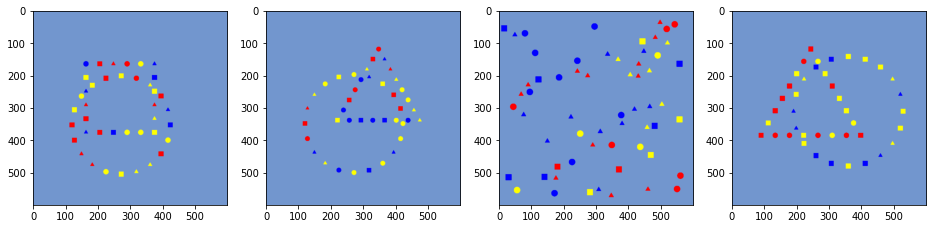

In [11]:
obs = [46, 120, 1345, 2593]
fig, ax = plt.subplots(1, 4, figsize=[16, 8])
for i in range(4):
    ax[i].imshow(get_img(obs[i])[0].cpu().permute(1,2,0))

### LIME

In [12]:
def mask(i):
    return segmentation.quickshift(
        get_img(i)[0].permute(1, 2, 0).cpu().double(), 
        kernel_size=5, 
        max_dist=7, 
        ratio=0.7)

def show_attr(attr_map):
    visualization.visualize_image_attr(
        attr_map.permute(1, 2, 0).cpu().numpy(),
        method='heat_map',
        sign='all',
        show_colorbar=True
    )

In [13]:
get_img(1)[1]
mask(1)

array([[   0,    0,    0, ...,   62,   62,   62],
       [   0,    0,    0, ...,   62,   62,   62],
       [   0,    0,    0, ...,   62,   62,   62],
       ...,
       [2497, 2497, 2497, ..., 2472, 2472, 2472],
       [2497, 2497, 2497, ..., 2472, 2472, 2472],
       [2497, 2497, 2497, ..., 2472, 2472, 2472]])

46


Lime attribution: 100%|██████████| 200/200 [00:01<00:00, 162.45it/s]


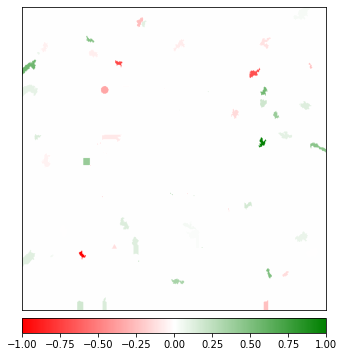

120


Lime attribution: 100%|██████████| 200/200 [00:01<00:00, 168.54it/s]


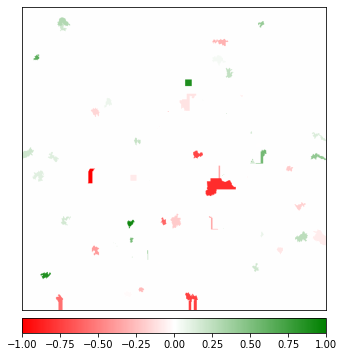

1345


Lime attribution: 100%|██████████| 200/200 [00:01<00:00, 164.56it/s]


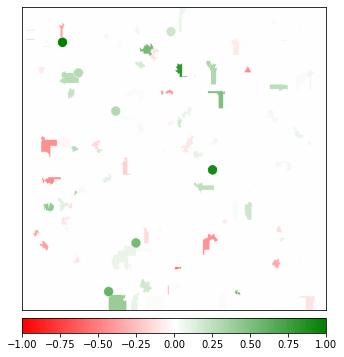

2593


Lime attribution: 100%|██████████| 200/200 [00:01<00:00, 167.09it/s]


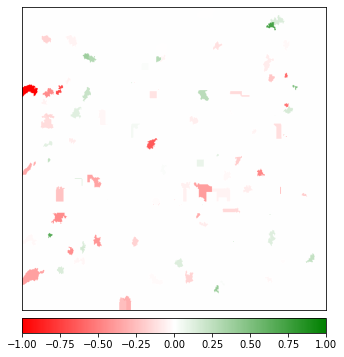

In [14]:
exp_lime = Lime(model)
def attr_lime(i):
    return exp_lime.attribute(
        get_img(i)[0].unsqueeze(0), 
        target=get_img(i)[1], 
        n_samples=200, 
        feature_mask=torch.as_tensor(mask(i)).to(device),
        show_progress=True)
for o in obs:
    print(o)
    show_attr(attr_lime(o)[0])

### Saliency

In [15]:
from captum.attr import Saliency

In [16]:
exp_saliency = Saliency(model)

46


/opt/conda/lib/python3.7/site-packages/captum/_utils/gradient.py:59: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  "required_grads has been set automatically." % index


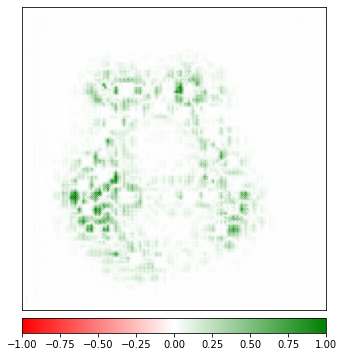

120


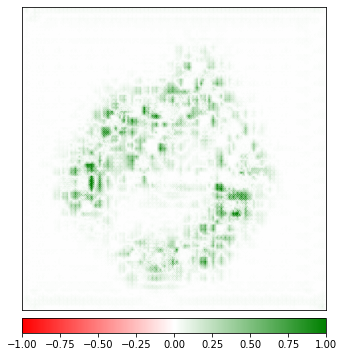

1345


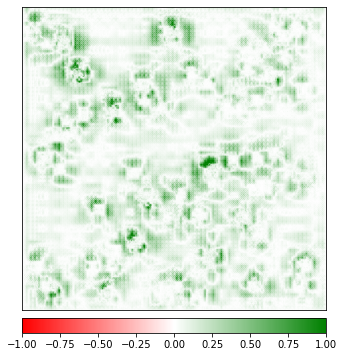

2593


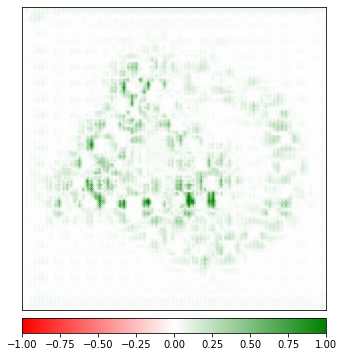

In [17]:
def attr_sailency(i):
    return exp_saliency.attribute(
    inputs=get_img(i)[0].unsqueeze(0),
    target=get_img(i)[1])

for o in obs:
    print(o)
    show_attr(attr_sailency(o)[0])

### Integrated Gradients

In [18]:
baselines = (0.4508, 0.5903, 0.8099) # baseline po normalizacji
baselines = torch.tensor(np.stack([np.full((600,600), baselines[0]), 
                                   np.full((600,600), baselines[1]), 
                                   np.full((600,600), baselines[2])])).float().to(device)

In [19]:
from captum.attr import IntegratedGradients
exp_ig = IntegratedGradients(model)

46


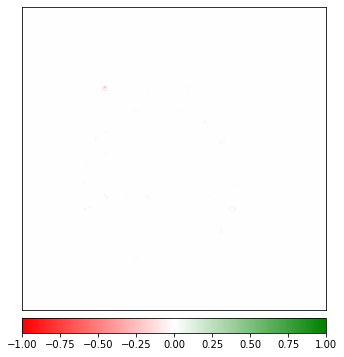

120


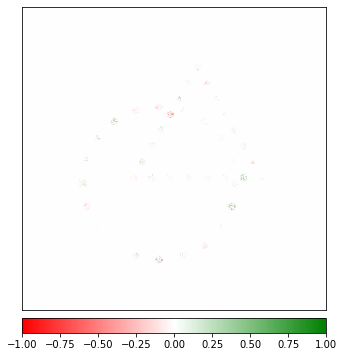

1345


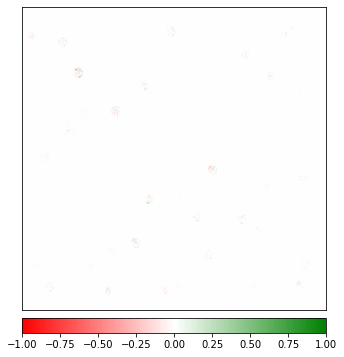

2593


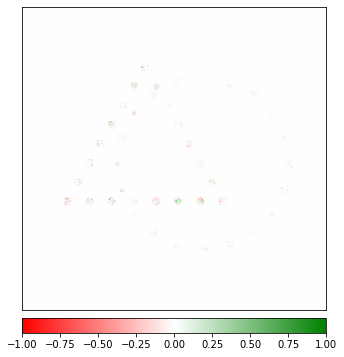

In [20]:
def attr_ig(i):
    return exp_ig.attribute(
    inputs=get_img(i)[0].unsqueeze(0),
    target=get_img(i)[1],
    baselines=baselines.unsqueeze(0))
for o in obs:
    print(o)
    show_attr(attr_ig(o)[0])

### InputXGradient

In [21]:
from captum.attr import InputXGradient
ixg_exp = InputXGradient(model)

def attr_ixg(i):
    return ixg_exp.attribute(
    inputs=get_img(i)[0].unsqueeze(0),
    target=get_img(i)[1])

46


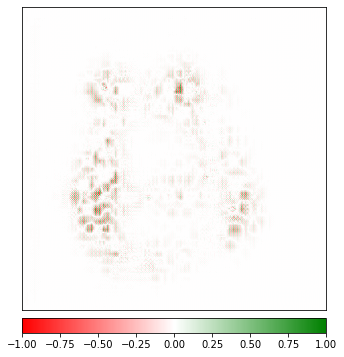

120


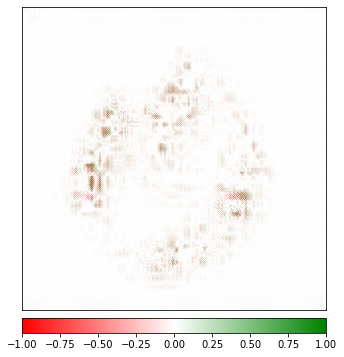

1345


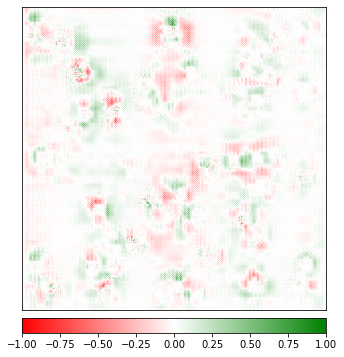

2593


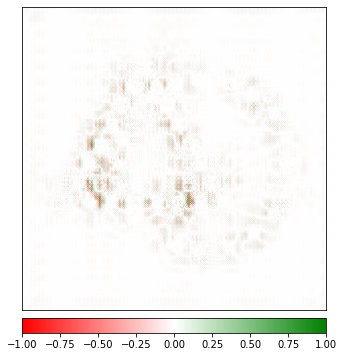

In [22]:
for o in obs:
    print(o)
    show_attr(attr_ixg(o)[0].detach())

### Gradient Shap

In [23]:
from captum.attr import GradientShap
gshap_exp = GradientShap(model)

def attr_gshap(i):
    return gshap_exp.attribute(
    inputs=get_img(i)[0].unsqueeze(0),
    target=get_img(i)[1],
    stdevs=0.0001,
    baselines=baselines.unsqueeze(0))

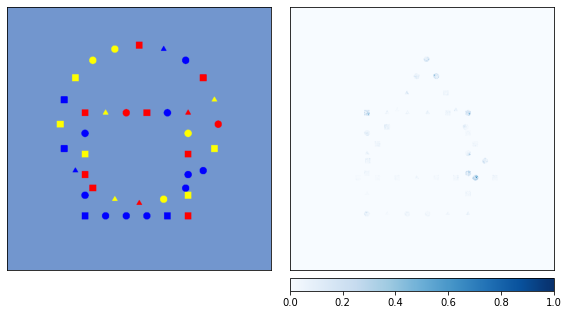

In [24]:
attributions_gs = attr_gshap(1)[0]
_ = visualization.visualize_image_attr_multiple(np.transpose(attributions_gs.squeeze().cpu().detach().numpy(), (1,2,0)),
                                      np.transpose(img.squeeze().cpu().detach().numpy(), (1,2,0)),
                                      ["original_image", "heat_map"],
                                      ["all", "absolute_value"],
                                      show_colorbar=True)

46


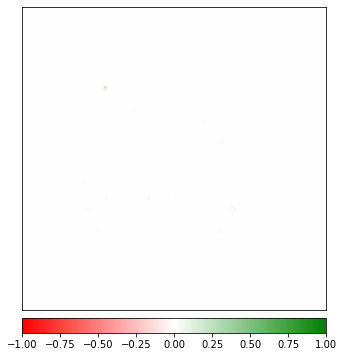

120


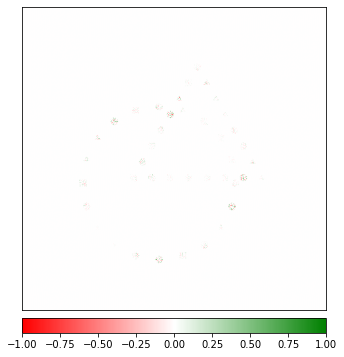

1345


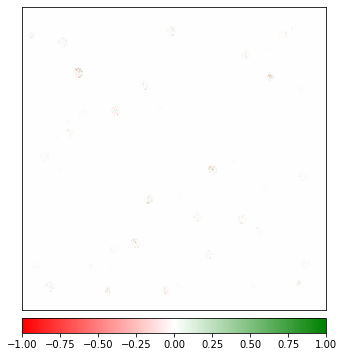

2593


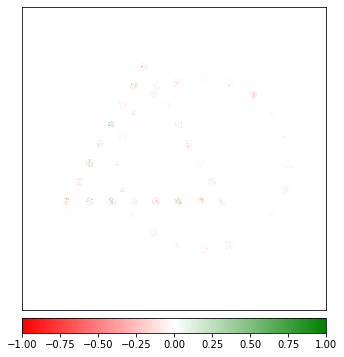

In [25]:
for o in obs:
    print(o)
    show_attr(attr_gshap(o)[0])

## TODO:
- nagranie 29.05
- segmentacja
- 